In [1]:
import os
from osgeo import gdal, osr
import numpy as np
from osgeo.gdalconst import GDT_Float32

In [2]:
# input_file = '../bioclim2000-10/wc2.1_2.5m_2000_1.grd'
# output_file = '../bioclim2000-10/wc2.1_2.5m_2000_1.tiff'
# output_file_asc = '../bioclim2000-10/wc2.1_2.5m_2000_1.asc'

def translate_to_tiff(input_file, output_file):
    """
    Function to convert data from asc, grd format to GeoTiff
    """
    drv = gdal.GetDriverByName('GTiff')
    ds_in = gdal.Open(input_file)
    ds_out = drv.CreateCopy(output_file, ds_in)
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(4326)
    ds_out.SetProjection(srs.ExportToWkt())
    matrix = ds_in.ReadAsArray()
    ds_in = None
    ds_out = None
    return matrix

def bioclim_values_to_tiff(input_file, output_file, values):
    in_data, out_data = None, None
    in_data = gdal.Open(input_file)
    if in_data is None:
        print ('Unable to open %s' % raster_input)
        return None

    # read in data from first band of input raster
    band1 = in_data.GetRasterBand(1)
    rows = in_data.RasterYSize
    cols = in_data.RasterXSize
    vals = band1.ReadAsArray(0, 0, cols, rows)

    driver = in_data.GetDriver()
    number_of_bands = values.shape[0]
    out_data = driver.Create(output_file, cols, rows, number_of_bands, GDT_Float32)
    for i in range(number_of_bands):
        out_band = out_data.GetRasterBand(i+1)
        out_band.WriteArray(values[i, :, :])
    out_band.FlushCache()
    out_band.SetNoDataValue(-32767.)

    out_data.SetGeoTransform(in_data.GetGeoTransform())
    out_data.SetProjection(in_data.GetProjection())
    del out_data
    return output_file
def bioclim_values_to_separate_tiff(input_file, output_file, values):
    in_data, out_data = None, None
    in_data = gdal.Open(input_file)
    if in_data is None:
        print ('Unable to open %s' % raster_input)
        return None

    # read in data from first band of input raster
    band1 = in_data.GetRasterBand(1)
    rows = in_data.RasterYSize
    cols = in_data.RasterXSize
    vals = band1.ReadAsArray(0, 0, cols, rows)

    driver = in_data.GetDriver()
    out_data = driver.Create(output_file, cols, rows, 1, GDT_Float32)

    out_band = out_data.GetRasterBand(1)
    out_band.WriteArray(values)
    out_band.FlushCache()
    out_band.SetNoDataValue(-32767.)

    out_data.SetGeoTransform(in_data.GetGeoTransform())
    out_data.SetProjection(in_data.GetProjection())
    del out_data
    return output_file



In [3]:
grd_files = [file for file in os.listdir('../bioclim/') if '.grd' in file]

In [4]:
grd_files

['wc2.1_2.5m_2006_1.grd',
 'wc2.1_2.5m_2004_1.grd',
 'wc2.1_2.5m_2000_1.grd',
 'wc2.1_2.5m_2002_1.grd',
 'wc2.1_2.5m_2005_1.grd',
 'wc2.1_2.5m_2007_1.grd',
 'wc2.1_2.5m_2003_1.grd',
 'wc2.1_2.5m_2018_1.grd',
 'wc2.1_2.5m_2001_1.grd',
 'wc2.1_2.5m_2014_1.grd',
 'wc2.1_2.5m_2016_1.grd',
 'wc2.1_2.5m_2012_1.grd',
 'wc2.1_2.5m_2010_1.grd',
 'wc2.1_2.5m_2009_1.grd',
 'wc2.1_2.5m_2017_1.grd',
 'wc2.1_2.5m_2015_1.grd',
 'wc2.1_2.5m_2011_1.grd',
 'wc2.1_2.5m_2008_1.grd',
 'wc2.1_2.5m_2013_1.grd']

In [5]:
grd_files = [file for file in os.listdir('../bioclim/') if '.grd' in file]
list_of_matrix = []
for file in grd_files:
    input_file_grd = os.path.join('../bioclim', file)
    output_file_tiff = os.path.join('../bioclim',\
                               os.path.splitext(file)[0]+'.tiff')
    m = translate_to_tiff(input_file_grd, output_file_tiff)
    list_of_matrix.append(m)
    
    

# compute mean without nan values along 0 axis
mean_bioclim = np.nanmean(list_of_matrix, axis=0)

/Users/mikhailgasanov/opt/anaconda3/envs/maxvol_soil_sampling/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [6]:
for index,matrix in enumerate(list_of_matrix):
    print(index, matrix.shape)

0 (19, 768, 1320)
1 (19, 768, 1320)
2 (19, 768, 1320)
3 (19, 768, 1320)
4 (19, 768, 1320)
5 (19, 768, 1320)
6 (19, 768, 1320)
7 (19, 768, 1320)
8 (19, 768, 1320)
9 (19, 768, 1320)
10 (19, 768, 1320)
11 (19, 768, 1320)
12 (19, 768, 1320)
13 (19, 768, 1320)
14 (19, 768, 1320)
15 (19, 768, 1320)
16 (19, 768, 1320)
17 (19, 768, 1320)
18 (19, 768, 1320)


In [7]:
output_bioclim_mean = os.path.join('../bioclim/', 'bioclim_mean.tiff')
# save mean_bioclim as GeoTiff - all bands
out_file = bioclim_values_to_tiff(input_file=output_file_tiff, \
                                  output_file=output_bioclim_mean, \
                                  values = mean_bioclim)


In [8]:
# Save biolimatic variables as separated GeoTiff files
for index, bioclim in enumerate(mean_bioclim):
    data_to_tiff = mean_bioclim[index, :,:]
    output_bioclim_mean = os.path.join('../bioclim/', f'bioclim_mean_{index+1}.tiff')
    out_file = bioclim_values_to_separate_tiff(input_file=output_file_tiff, \
                                  output_file=output_bioclim_mean, \
                                  values = data_to_tiff)

In [10]:
# translate GeoTiff to ASCII
for index in range(19):
    asc_file = os.path.join('../bioclim', f'bioclim_mean_{index+1}.asc')
    tiff_file = os.path.join('../bioclim', f'bioclim_mean_{index+1}.tiff')
    ds = gdal.Open(tiff_file)
    ds = gdal.Translate(asc_file, ds)
    ds = None

In [12]:
# asc files
asc_files=[]
for file in os.listdir('../bioclim/'):
    if 'asc' in file:
        print(file)
        asc_files.append(file)

bioclim_mean_10.asc
bioclim_mean_9.asc.aux.xml
bioclim_mean_11.asc
bioclim_mean_13.asc
bioclim_mean_17.asc.aux.xml
bioclim_mean_8.asc
bioclim_mean_9.asc
bioclim_mean_12.asc
bioclim_mean_16.asc
bioclim_mean_12.asc.aux.xml
bioclim_mean_5.asc.aux.xml
bioclim_mean_17.asc
bioclim_mean_15.asc
bioclim_mean_14.asc
bioclim_mean_18.asc.aux.xml
bioclim_mean_6.asc.aux.xml
bioclim_mean_11.asc.aux.xml
bioclim_mean_3.asc.aux.xml
bioclim_mean_14.asc.aux.xml
bioclim_mean_4.asc.aux.xml
bioclim_mean_13.asc.aux.xml
bioclim_mean_1.asc.aux.xml
bioclim_mean_16.asc.aux.xml
bioclim_mean_8.asc.aux.xml
bioclim_mean_19.asc
bioclim_mean_2.asc
bioclim_mean_3.asc
bioclim_mean_18.asc
bioclim_mean_15.asc.aux.xml
bioclim_mean_1.asc
bioclim_mean_2.asc.aux.xml
bioclim_mean_10.asc.aux.xml
bioclim_mean_4.asc
bioclim_mean_5.asc
bioclim_mean_7.asc.aux.xml
bioclim_mean_19.asc.aux.xml
bioclim_mean_7.asc
bioclim_mean_6.asc


In [13]:
os.makedirs(os.path.join('..', 'bioclim', 'asc_files'))

In [16]:
import shutil

In [14]:
# copy all file into separate folder
!cp ../bioclim/*.asc* ../bioclim/asc_files/

In [17]:
shutil.make_archive('../bioclim/asc_bioclim_files', 'zip', '../bioclim/asc_files/')

'/Users/mikhailgasanov/Documents/GIT/herscleum_sosnowskyi/bioclim/asc_bioclim_files.zip'

<AxesSubplot:ylabel='Count'>

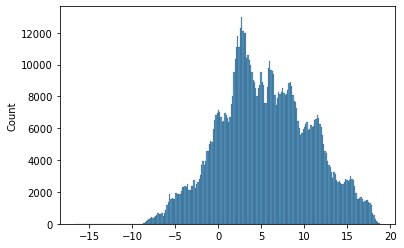

In [20]:
import seaborn as sns
sns.histplot(mean_bioclim[0,:,:].flatten())

In [27]:
src_2019 = gdal.Open('../bioclim2010-20/wc2.1_2.5m_2019_1.grd').ReadAsArray()
src_2020 = gdal.Open('../bioclim2010-20/wc2.1_2.5m_2020_1.grd').ReadAsArray()

<AxesSubplot:ylabel='Count'>

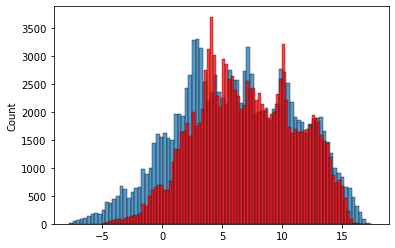

In [30]:
sns.histplot(src_2019[0, :, :].flatten()-273.15)
sns.histplot(src_2020[0, :, :].flatten()-273.15, label='2020', color='r' )

In [ ]:
sns.histplot(src_2019[0, :, :].flatten()-273.15)

In [33]:
src = gdal.Open('../bioclim/merged.tif')

In [34]:
matrix = src.ReadAsArray()

In [35]:
reshaped = matrix.reshape(21,19,800,1375)

In [42]:
np.nanmean(reshaped[-1,0,...] - 273.15)

-64.078384

In [43]:
reshaped[-1,0,...].shape

(800, 1375)

In [ ]:
np.nanmean(reshaped[-1,...])

In [208]:
reshaped = matrix.reshape(21,19,800,1375)
reshaped = reshaped[]
reshaped_mean = np.nanmean(reshaped, axis=0)

/Users/mikhailgasanov/opt/anaconda3/envs/maxvol_soil_sampling/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [209]:
reshaped_mean.shape


(19, 800, 1375)

In [215]:
path_to_folder = '../bioclim/'
file = 'wc2.1_2.5m_2000_1.grd'
input_file_grd = os.path.join(path_to_folder, file)
output_file_tiff = os.path.join(path_to_folder,\
                           os.path.splitext(file)[0]+'.tiff')
m = translate_to_tiff(input_file_grd, output_file_tiff)


In [218]:
output_file_tiff = os.path.join(path_to_folder, 'merged.tif')

In [32]:
reshaped_mean

NameError: name 'reshaped_mean' is not defined

In [224]:
# Save biolimatic variables as separated GeoTiff files
path_to_folder = '../bioclim/'
for index, bioclim in enumerate(reshaped_mean):
    if index == 
    data_to_tiff = reshaped_mean[index, :,:]
    output_bioclim_mean = os.path.join(path_to_folder, f'bioclim_mean_{index}.tiff')
    out_file = bioclim_values_to_separate_tiff(input_file=output_file_tiff, \
                                  output_file=output_bioclim_mean, \
                                  values = data_to_tiff)
    asc_file = os.path.join(path_to_folder, f'bioclim_mean_{index+1}.asc')
#     tiff_file = os.path.join(path_to_folder, f'bioclim_mean_{index}.tiff')
    ds = gdal.Open(output_bioclim_mean)
    ds = gdal.Translate(asc_file, ds)
    ds = None

In [221]:
os.makedirs(os.path.join('..', 'bioclim', 'asc_files'))

In [228]:
!cp ../bioclim/*.asc* ../bioclim/asc_files/

In [229]:
shutil.make_archive('../bioclim/asc_bioclim_files', 'zip', '../bioclim/asc_files/')

'/Users/mikhailgasanov/Documents/GIT/herscleum_sosnowskyi/bioclim/asc_bioclim_files.zip'

In [230]:
!ls ../bioclim | grep zip

asc_bioclim_files.zip


In [195]:
bioclim_1 = gdal.Open('../bioclim2000-10/asc_files/bioclim_mean_1.asc').ReadAsArray()

In [192]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

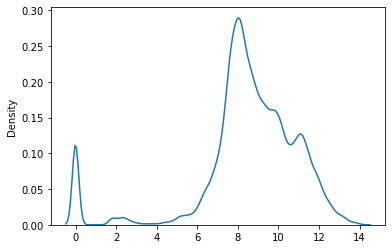

In [210]:
sns.kdeplot(data=reshaped_mean[1,:,:].flatten())

<AxesSubplot:ylabel='Density'>

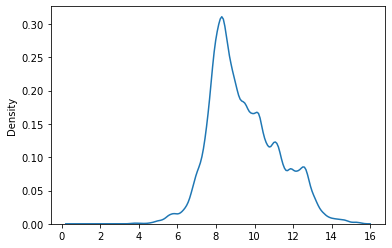

In [199]:
sns.kdeplot(bioclim_1.flatten())

In [211]:
src.ReadAsArray()

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb546ccd120> >

In [ ]:
src_2019 = 